# 1. The LASSO and Boosting for Regression

Ruotian Jiang 
8389636738

# a & b

In [24]:
import csv
from sklearn.preprocessing import Imputer
with open('/Users/ruotianjiang/Downloads/communities.csv', 'r') as f:
    reader = csv.reader(f)
    data=[]
    communityname=[]
    for row in reader:
        a=[]
        for x in row:
            i = x.strip()
            if i == '?':
                a.append('NaN')
            else:
                a.append(i)
        communityname.append(a[3])
        data.append(a[:3]+a[4:])
deal = Imputer(missing_values='NaN',axis=0)
imputer = deal.fit(data)
output = imputer.transform(data)
print output
print communityname

[[  8.00000000e+00   5.88268293e+01   4.61883366e+04 ...,   3.20000000e-01
    1.40000000e-01   2.00000000e-01]
 [  5.30000000e+01   5.88268293e+01   4.61883366e+04 ...,   0.00000000e+00
    1.95078370e-01   6.70000000e-01]
 [  2.40000000e+01   5.88268293e+01   4.61883366e+04 ...,   0.00000000e+00
    1.95078370e-01   4.30000000e-01]
 ..., 
 [  9.00000000e+00   9.00000000e+00   8.00700000e+04 ...,   9.10000000e-01
    2.80000000e-01   2.30000000e-01]
 [  2.50000000e+01   1.70000000e+01   7.26000000e+04 ...,   2.20000000e-01
    1.80000000e-01   1.90000000e-01]
 [  6.00000000e+00   5.88268293e+01   4.61883366e+04 ...,   1.00000000e+00
    1.30000000e-01   4.80000000e-01]]
['Lakewoodcity', 'Tukwilacity', 'Aberdeentown', 'Willingborotownship', 'Bethlehemtownship', 'SouthPasadenacity', 'Lincolntown', 'Selmacity', 'Hendersoncity', 'Claytoncity', 'DalyCitycity', 'RockvilleCentrevillage', 'Needhamtown', 'GrandChutetown', 'DanaPointcity', 'FortDodgecity', 'Albanycity', 'Denvilletownship', 'Val

# c

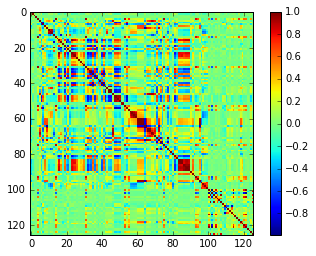

In [25]:
import numpy as np
from matplotlib import pyplot as plt
X=[]
Y=[]
for row in output:
    X.append(row[:-1])
    Y.append(row[-1])
X=np.array(X)
Y=np.array(Y)
feature=X.T
correlations = np.corrcoef(feature)

plt.imshow(correlations,interpolation='nearest')
plt.colorbar()
plt.show()

# d

In [26]:
from scipy.stats import variation
var = variation(X, axis=0)
print var


[ 0.57152759  1.3772781   0.35040154  0.52293098  2.20294993  0.3532097
  1.41056656  0.32370036  1.35882134  1.61387296  0.36574812  0.29061999
  0.49503634  0.42333552  2.00124163  0.63868866  0.579608    0.32762787
  0.69985456  0.35914986  0.36842021  0.6988552   0.3495514   0.52759954
  0.54549659  0.5074249   0.58932117  0.80948203  0.60604183  0.67047639
  0.47384086  2.30439167  0.75379109  0.67543079  0.52815378  0.57825579
  0.55599333  0.34724014  0.5104523   0.39812581  0.5083338   0.422
  0.39548416  0.40371035  0.3591826   0.371375    0.31687526  0.33052823
  0.3323925   0.32934323  0.32846855  0.33616412  0.33263868  2.99344555
  0.91957222  2.89976977  0.6840295   0.58474358  0.50478324  0.45555177
  1.29977426  1.29730638  1.28091166  1.28371176  0.28860078  1.45870069
  0.73435052  0.75691886  0.36682182  0.31932719  0.46833631  0.3502283
  1.1269169   0.34828327  0.81068443  1.9582885   0.26957935  0.33745632
  1.0644754   0.43600961  0.47029345  0.91798069  0.848531

# e

[4, 9, 14, 31, 53, 55, 75, 93, 94, 117, 124]
(1994, 11)


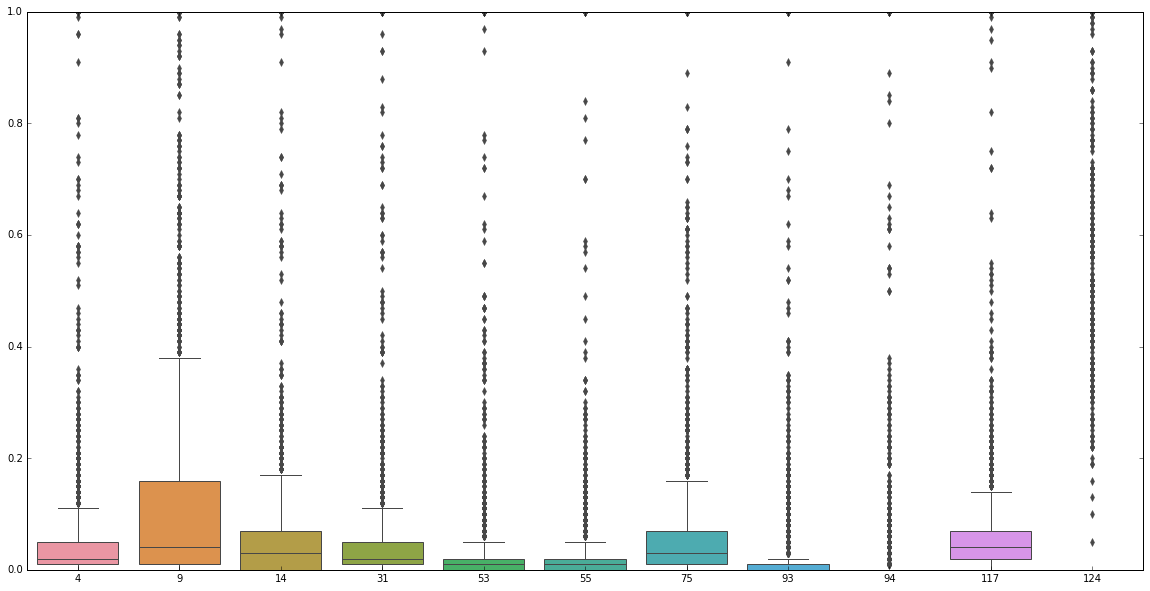

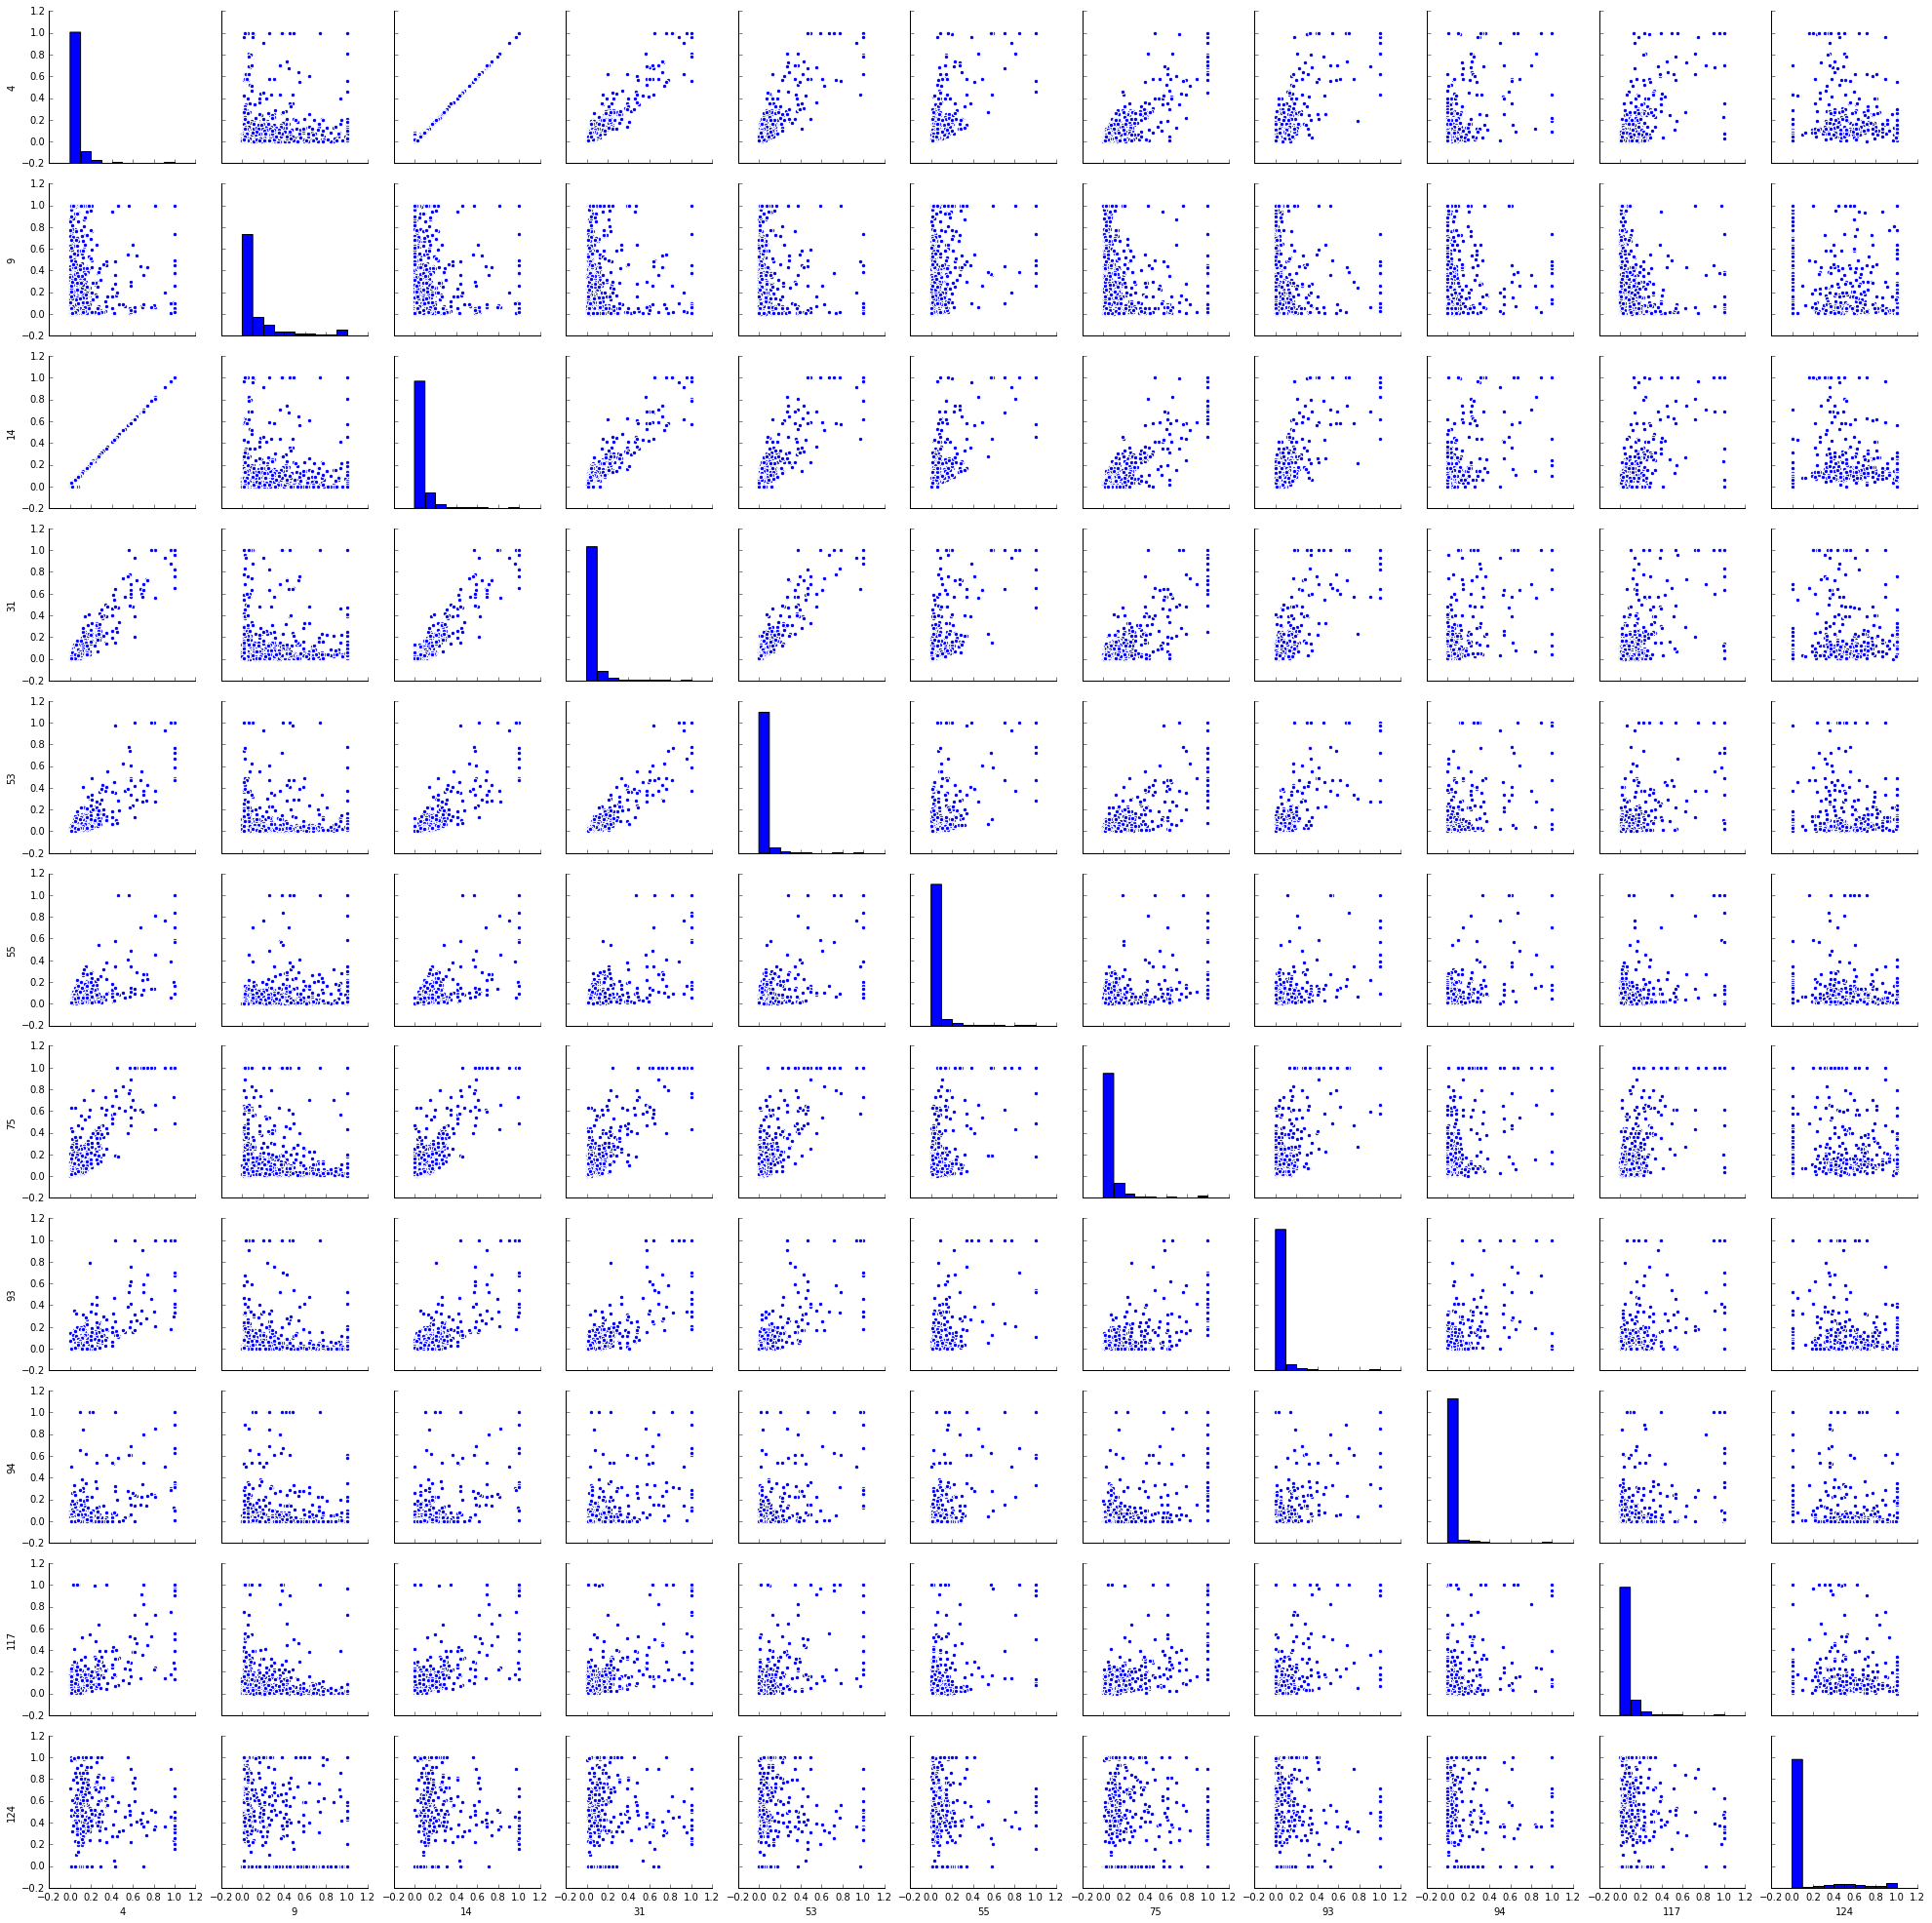

In [27]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
k=11
alist = list(var)
index = sorted(range(len(alist)), key=lambda k: alist[k],reverse=True)[0:k]
#get 11 features' index
index.sort()
print index
subX = []
for i in X:
    row = []
    for j in index:
        row.append(i[j])
    subX.append(row)
index=['4', '9', '14', '31', '53', '55', '75', '93', '94', '117', '124']
subX=np.array(subX)
dataframe = pd.DataFrame(subX, columns=index)
ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=dataframe) 


print subX.shape

g = sns.pairplot(dataframe)



# f
Attribute Information: (122 predictive, 5 non-predictive, 1 goal), so I choose X feature from index 4 in following:

In [28]:
from sklearn import linear_model
X_train = X[:1495,4:]
X_test = X[1495:,4:]
Y_train = Y[:1495]
Y_test = Y[1495:]
reg = linear_model.LinearRegression()
reg.fit (X_train,Y_train)
print reg.score(X_test,Y_test)
testerror= 1 - reg.score(X_test,Y_test)
print testerror


-15.6064669504
16.6064669504


# g

In [29]:
from sklearn import linear_model
reg = linear_model.RidgeCV() 
reg.fit (X_train,Y_train) 
print reg.score(X_test,Y_test)

0.627021995707


# h


In [30]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

reg = linear_model.LassoCV() 
reg.fit (X_train,Y_train) 
print reg.score(X_test,Y_test)
sfm = SelectFromModel(reg)
sfm.fit (X_train,Y_train)
print sfm.get_support(indices=True)

0.630503976978
[  2   7  11  13  14  15  17  18  22  23  24  25  26  28  33  38  44  45
  46  48  50  53  59  67  68  69  71  72  74  75  76  78  82  85  86  88
  90  91  94 101 102 114 115 118 119 120]


In [31]:
# Repeat with normalized features and score is improved slightly
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

reg = linear_model.LassoCV(normalize=True) 
reg.fit (X_train,Y_train) 
print reg.score(X_test,Y_test)
sfm = SelectFromModel(reg)
sfm.fit (X_train,Y_train)
print sfm.get_support(indices=True)

0.631804856604
[  2   3   7  11  15  17  18  23  24  25  38  44  45  48  50  68  69  71
  72  74  75  86  88  90  91  94  99 101 102 110 118 119 120 121]


# i

[0.056545240946666395, 0.033165927121858257, 0.029419347704705955, 0.028396794617765279, 0.028502439023133132, 0.026234815609429963, 0.026265859685413683, 0.025872853471978385, 0.021959466321352584, 0.021134679440138346, 0.021050152107538807, 0.021060967801450295, 0.021128486396771562, 0.020890532861087094, 0.020903123773029306, 0.020860058037153774, 0.02081156469118333, 0.020692684872407139, 0.020442885961710257, 0.02046534738376728, 0.020482909941892075, 0.020500733294658458, 0.020414177780887336, 0.020440296123176632, 0.020468951568563081, 0.020477988642937085, 0.020483118624945874, 0.020279740059440124, 0.020211737077820854, 0.020224059072378751, 0.020141520747341452, 0.019990610487204317, 0.020017481991480061, 0.019994723479925994, 0.020010793683892001, 0.02005534261020455, 0.020016482133478685, 0.019994750582621856, 0.020017625588201006, 0.020036632728649289, 0.020072159025839371, 0.020081959071007589, 0.020035432627517981, 0.020027020915201938, 0.019923826151022696, 0.0199363175

(-1, 140.0)

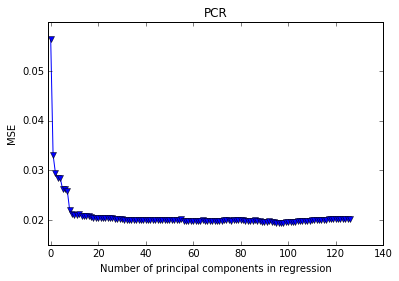

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
# x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
pca = PCA()
pca.fit(scale(X_train))
X_reduced = pca.transform(scale(X_train))
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
regr = LinearRegression()
mse = []
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), Y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
mse.append(score)
for i in np.arange(1, 127):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], Y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print mse
print min(mse)
print sorted(range(len(mse)), key=lambda k: mse[k],reverse=False)[0:1]
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PCR')
plt.xlim(xmin=-1)

In [33]:
# I got that M=96 is best  
i=96
regr.fit(X_reduced[:,:i],Y_train)
X_reduced_test = pca.transform(scale(X_test))
print regr.score(X_reduced_test[:,:i],Y_test)

0.60521908736


# j

In [34]:
import xgboost
from xgboost import plot_tree
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

data = xgboost.DMatrix(X_train,label=Y_train)
plt.show()
a=[0.01,0.05,0.1,0.5,1,10,100]
score=[]
for i in a:
    params={'alpha':i}
    get = xgboost.cv(params,data)
    score.append(get['test-rmse-mean'].mean())
print score
    


[0.17734993333333332, 0.17807223333333333, 0.17808856666666667, 0.17587619999999998, 0.17664103333333331, 0.18427713333333334, 0.23509173333333333]


In [35]:
# a=0.1 is best
from sklearn.tree import export_graphviz
import graphviz

model = XGBClassifier(reg_alpha=0.1)
model.fit(X_train, Y_train)
plot_tree (model)
plt.show()

ImportError: No module named graphviz